In [1]:
import numpy as np
import cvxpy as cp
import osbdo as ob

In [2]:
import time
import random


np.random.seed(0) 
random.seed(0)

# Problem description
section 4.1 in https://web.stanford.edu/~boyd/papers/os_bundle_distr_opt.html 

# Create parameters

In [3]:
# ms = [5, 5, 12, 10, 6]
# ns = [5, 12, 10, 6, 9]
ms = [20, 30, 40, 25, 35]
ns = [30, 40, 25, 35, 20]
params = ob.sc_params(ms, ns)

# Distributed solution

In [4]:
agents = ob.sc_agents(params)
g = ob.sc_coupling(params, agents)
prob = ob.Problem(agents = agents, g = g)

In [5]:
ob.add_extra_methods_to_problem(prob)

In [6]:
max_iter = 150
start_time = time.time()
x_agent, x_global = prob.solve_var_metric(rel_gap=10**(-5), abs_gap=10**(-5), max_iter=max_iter,\
                                          memory=max_iter, poorman=True, print_freq=50)
print(f"elapsed time = {time.time() - start_time}")

k=0, rel_gap=inf, L=-2074.3559134842617, U=4409.906115002427, L0=-2074.3559134842617
   CS status='init', iters=1


/Users/parshakova.tanya/opt/anaconda3/envs/osbdo/lib/python3.9/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


k=50, rel_gap=0.23040629908736998, L=-95.20504304826477, U=-77.37691453537036, L0=-95.20504304826477
   CS status='null', iters=1
k=100, rel_gap=0.04678081402367668, L=-84.80387163047112, U=-81.0139720697565, L0=-84.80387163047112
   CS status='descent', iters=1
elapsed time = 184.5854070186615


In [7]:
prob.lower_bnd[-1], prob.upper_bnd[-1]

(-82.97007907838633, -81.10842475838794)

# Centralized solution

In [8]:
h_cvx, x_cvx, prob_cvx = ob.cvx_supply_chain(params=params)

In [9]:
h_cvx, prob.upper_bnd[-1]

(-81.1232713273431, -81.10842475838794)

# Plot

i=69, omega_k=0.11027455694084042, omega_true=0.009886449880777966


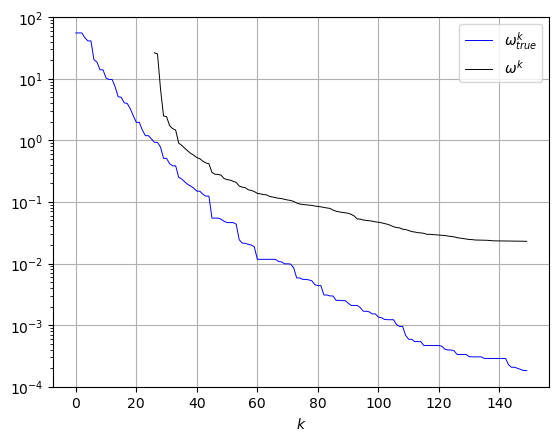

In [11]:
ob.plot_true_rel_gap_uk(y_min=1e-4, y_max=1e2, lk = prob.lower_bnd, uk = prob.upper_bnd, h_true = h_cvx, file_name='sc_var_metric_bounds.pdf')